In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# display plots in SVG format
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [15]:
basinsFile = "shelfInfo/sarr_basins_info.csv"

data = pd.read_csv(
            basinsFile,
            sep=r",",
            engine="c",
            na_filter=False,
            dtype=np.float,
            low_memory=False,
        )

borneoArea = data['borneoArea'].values[:]*1e-6
borneoLgth = data['borneoStream'].values[:]*1e-3

mkgArea = data['mekongArea'].values[:]*1e-6
mkgLgth = data['mekongStream'].values[:]*1e-3

siamArea = data['siamArea'].values[:]*1e-6
siamLgth = data['siamStream'].values[:]*1e-3

jhrArea = data['johoreArea'].values[:]*1e-6
jhrLgth = data['johoreStream'].values[:]*1e-3

singapArea = data['singapArea'].values[:]*1e-6
singapLgth = data['singapStream'].values[:]*1e-3

sundaArea = data['sundaArea'].values[:]*1e-6
sundaLgth = data['sundaStream'].values[:]*1e-3

time = -np.flipud(np.arange(len(singapArea))*1000)*1.e-3

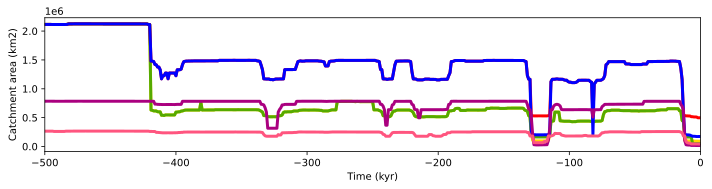

In [27]:
fig,ax = plt.subplots(1, 1, figsize=(10,2.75))

test = siamArea.copy()
test2 = jhrArea.copy()
test3 = borneoArea.copy()

plt.plot(time,borneoArea,color='gold', ls='-',lw=3)
plt.plot(time,siamArea,color='#55aa00', ls='-',lw=3)
plt.plot(time,mkgArea,color='#ff0000', ls='-',lw=3)
plt.plot(time,jhrArea,color='#0000ff', ls='-',lw=3)
plt.plot(time,sundaArea,color='#aa007f', ls='-',lw=3)
plt.plot(time,singapArea,color='#ff557f', ls='-',lw=3)
plt.xlim(-500,0)
plt.xlabel('Time (kyr)')
plt.ylabel('Catchment area (km2)')
fig.tight_layout()

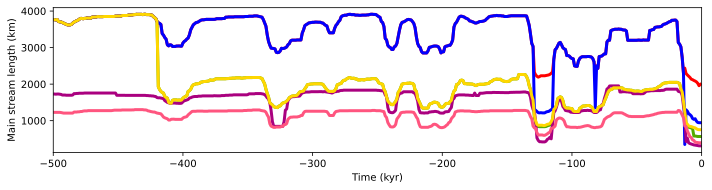

In [26]:
fig,ax = plt.subplots(1, 1, figsize=(10,2.75))

plt.plot(time,siamLgth,color='#55aa00', ls='-',lw=3)
plt.plot(time,mkgLgth,color='#ff0000', ls='-',lw=3)
plt.plot(time,jhrLgth,color='#0000ff', ls='-',lw=3)
plt.plot(time,sundaLgth,color='#aa007f', ls='-',lw=3)
plt.plot(time,borneoLgth,color='gold', ls='-',lw=3)
plt.plot(time,singapLgth,color='#ff557f', ls='-',lw=3)

# plt.grid()
plt.xlim(-500,0)
plt.xlabel('Time (kyr)')
plt.ylabel('Main stream length (km)')
fig.tight_layout()

In [22]:
shelfFile = "shelfInfo/sarr_shelf_info.csv"

data = pd.read_csv(
            shelfFile,
            sep=r",",
            engine="c",
            na_filter=False,
            dtype=np.float,
            low_memory=False,
        )

time = data['time'].values[:]
cumed_mean = data['cumed_mean'].values[:]
cumed_max = data['cumed_max'].values[:]
perc_exposed = data['perc_exposed'].values[:]

edmean_instantaneous = np.zeros(len(cumed_mean))
edmax_instantaneous = np.zeros(len(cumed_max))

for k in range(1,len(cumed_max)):
    edmean_instantaneous[k] = cumed_mean[k]-cumed_mean[k-1]
    edmax_instantaneous[k] = cumed_max[k]-cumed_max[k-1]

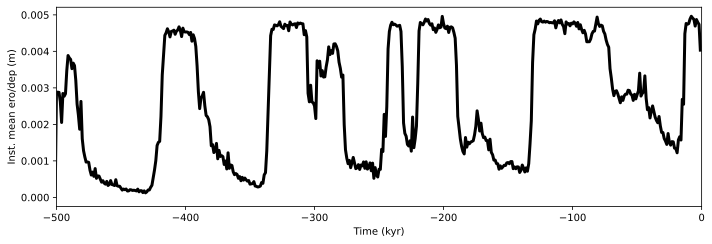

In [23]:
fig,ax = plt.subplots(1, 1, figsize=(10,3.5))

plt.plot(time,edmean_instantaneous,color='k', ls='-',lw=3)
plt.xlim(-500,0)
plt.xlabel('Time (kyr)')
plt.ylabel('Inst. mean ero/dep (m)')
fig.tight_layout()
#fig.savefig('erodep.pdf',dpi=900,transparent=True)

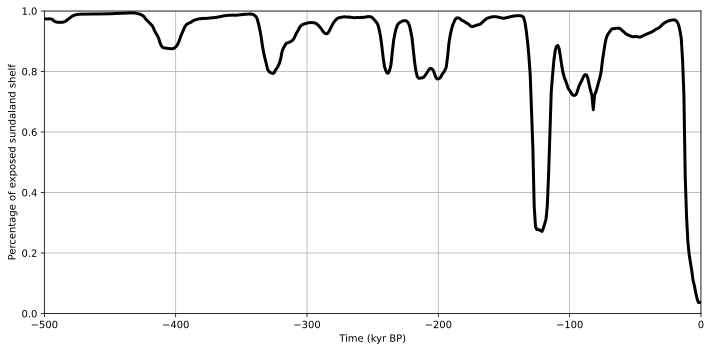

In [25]:
fig,ax = plt.subplots(1, 1, figsize=(10,5))

plt.plot(time, perc_exposed, color='k', ls='-', lw=3)

plt.grid()
plt.xlim(-500,0)
plt.ylim(0,1)
plt.xlabel('Time (kyr BP)')
plt.ylabel('Percentage of exposed sundaland shelf')
fig.tight_layout()